In [25]:
import pandas as pd

In [26]:
data = pd.read_csv("../data/train_df.csv")
data = data.dropna(subset=['words'])
data = data.sample(10000)

In [27]:
data

,target,id,date,flag,user,text,words
417330,0,1688036699,Sun May 03 10:11:23 PDT 2009,NO_QUERY,danmcdonogh,enjoying coffee sunday and rain ho hum so much...,enjoy coffee sunday rain ho hum much outdoor ride
375339,1,1556743116,Sun Apr 19 00:08:05 PDT 2009,NO_QUERY,ashleymiranda1,yessss was answering both questions lol ur rig...,yes answer question lol ur right mad get kinda...
565641,0,1957742572,Fri May 29 01:28:02 PDT 2009,NO_QUERY,YvetteObeney,bigfanfriday day amp go amp friggin loose life...,bigfanfriday day amp go amp friggin loose life...
146164,1,1956143256,Thu May 28 21:16:16 PDT 2009,NO_QUERY,ThorXD,hey sofi its torrie,hey sofi torrie
406562,0,1978885498,Sun May 31 00:48:50 PDT 2009,NO_QUERY,ConsoleCharlie,too hot,hot
...,...,...,...,...,...,...,...
180255,0,2068362931,Sun Jun 07 13:57:26 PDT 2009,NO_QUERY,sarahpenrose,know shes leaving so that she can finish her ...,know shes leave finish study
214486,1,2002094944,Tue Jun 02 03:07:28 PDT 2009,NO_QUERY,hanloosschilder,have to get my other two wisdom teeth out very...,get two wisdom teeth soon gah although mean gr...
341446,1,2177540492,Mon Jun 15 06:17:06 PDT 2009,NO_QUERY,Zappos_Service,those are super cute enjoy,super cute enjoy
36279,0,2238784320,Fri Jun 19 07:44:09 PDT 2009,NO_QUERY,o0omunkieo0o,sounds like you need some prayers noted thank...,sound like need prayer note thanks help yesterday


In [28]:
data['target'].value_counts()

target
1    5004
0    4996
Name: count, dtype: int64

In [29]:
df_neg = data[data['target'] == 0]
df_pos = data[data['target'] == 1]

In [31]:
def compter_mots(phrase):
    mots = phrase.split()
    return len(mots)

df_neg['nombre_de_mots'] = df_neg['text'].apply(lambda x: compter_mots(x))

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_19437/1624786463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['nombre_de_mots'] = df_neg['text'].apply(lambda x: compter_mots(x))


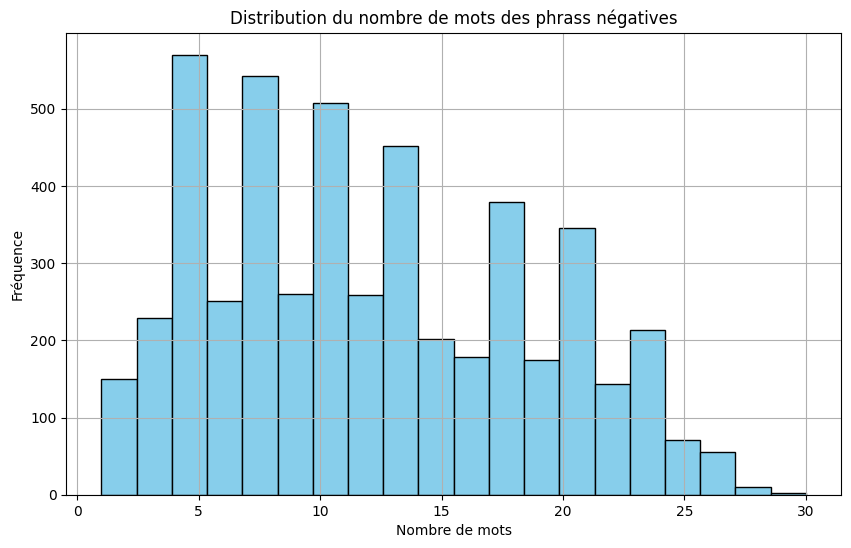

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_neg['nombre_de_mots'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution du nombre de mots des phrass négatives')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_19437/2493140727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))


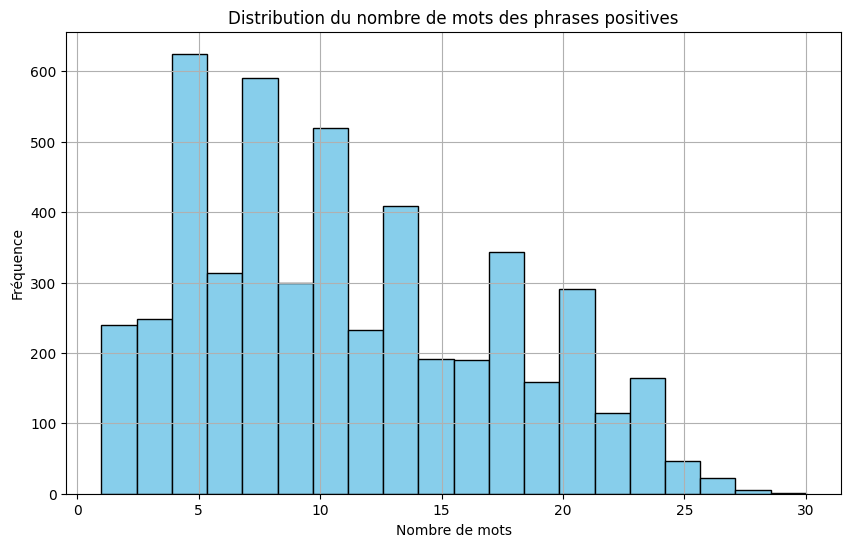

In [37]:
df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))
plt.figure(figsize=(10, 6))
plt.hist(df_pos['nombre_de_mots'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution du nombre de mots des phrases positives')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

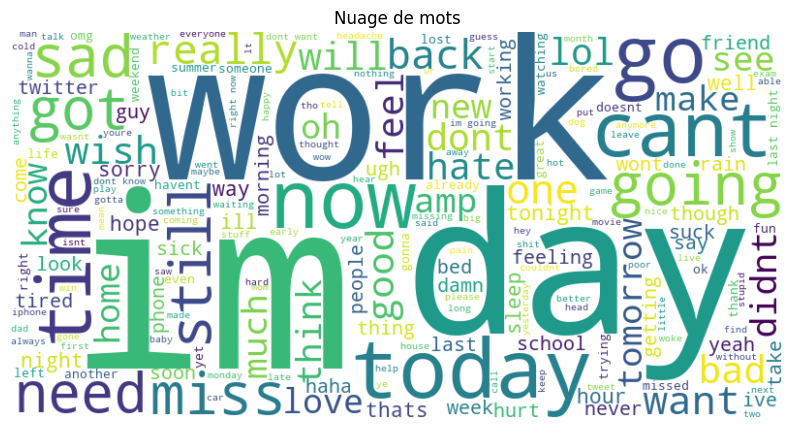

In [35]:
from wordcloud import WordCloud

texte_combine = ' '.join(df_neg['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_combine)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuage de mots')
plt.axis('off')
plt.show()

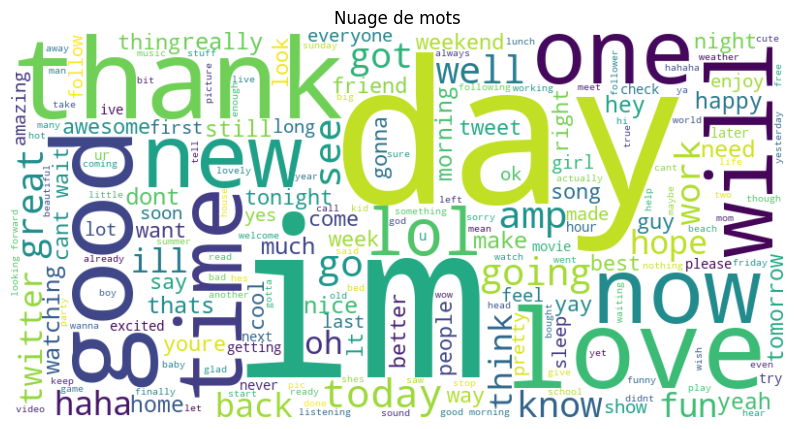

In [36]:
texte_combine = ' '.join(df_pos['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_combine)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuage de mots')
plt.axis('off')
plt.show()

In [39]:
print(data['date'].min())
print(data['date'].max())

Fri Apr 17 20:32:29 PDT 2009
Wed May 27 07:25:35 PDT 2009
